In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [ ]:
# Load the dataset
df = pd.read_csv('/content/heart.csv')

# Display the first few rows of the dataset to inspect
print(df.head())

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


In [ ]:
# Inspect dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
# Filling missing numerical values with the median for numerical features
numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
df[numerical_features] = df[numerical_features].fillna(df[numerical_features].median())

# Check for missing values again after filling
print(df.isnull().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [ ]:
# Convert 'Sex' into binary values: 0 for Male, 1 for Female
df['Sex'] = df['Sex'].map({'M': 0, 'F': 1})

# Encoding other categorical variables similarly
df['ChestPainType'] = df['ChestPainType'].map({'TA': 0, 'ATA': 1, 'NAP': 2, 'ASY': 3})
df['RestingECG'] = df['RestingECG'].map({'Normal': 0, 'ST': 1, 'LVH': 2})
df['ExerciseAngina'] = df['ExerciseAngina'].map({'N': 0, 'Y': 1})
df['ST_Slope'] = df['ST_Slope'].map({'Up': 0, 'Flat': 1, 'Down': 2})

# Checking if categorical features have been encoded correctly
print(df.head())

   Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0   40    0              1        140          289          0           0   
1   49    1              2        160          180          0           0   
2   37    0              1        130          283          0           1   
3   48    1              3        138          214          0           0   
4   54    0              2        150          195          0           0   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0    172               0      0.0         0             0  
1    156               0      1.0         1             1  
2     98               0      0.0         0             0  
3    108               1      1.5         1             1  
4    122               0      0.0         0             0  


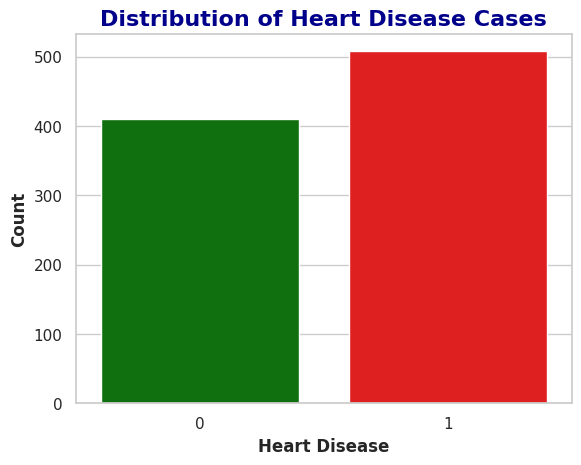

In [ ]:
# Part 2: Visuals

# Convert the HeartDisease column to string type if it's not already
df['HeartDisease'] = df['HeartDisease'].astype(str)

# Plot distribution of the target variable (HeartDisease) with specific colors
sns.countplot(x='HeartDisease', data=df, hue='HeartDisease', palette={'0': 'green', '1': 'red'}, dodge=False, legend=False)

# Add title and labels
plt.title('Distribution of Heart Disease Cases', fontsize=16, color='darkblue', fontweight='bold')
plt.xlabel('Heart Disease', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')

# Show the plot
plt.show()


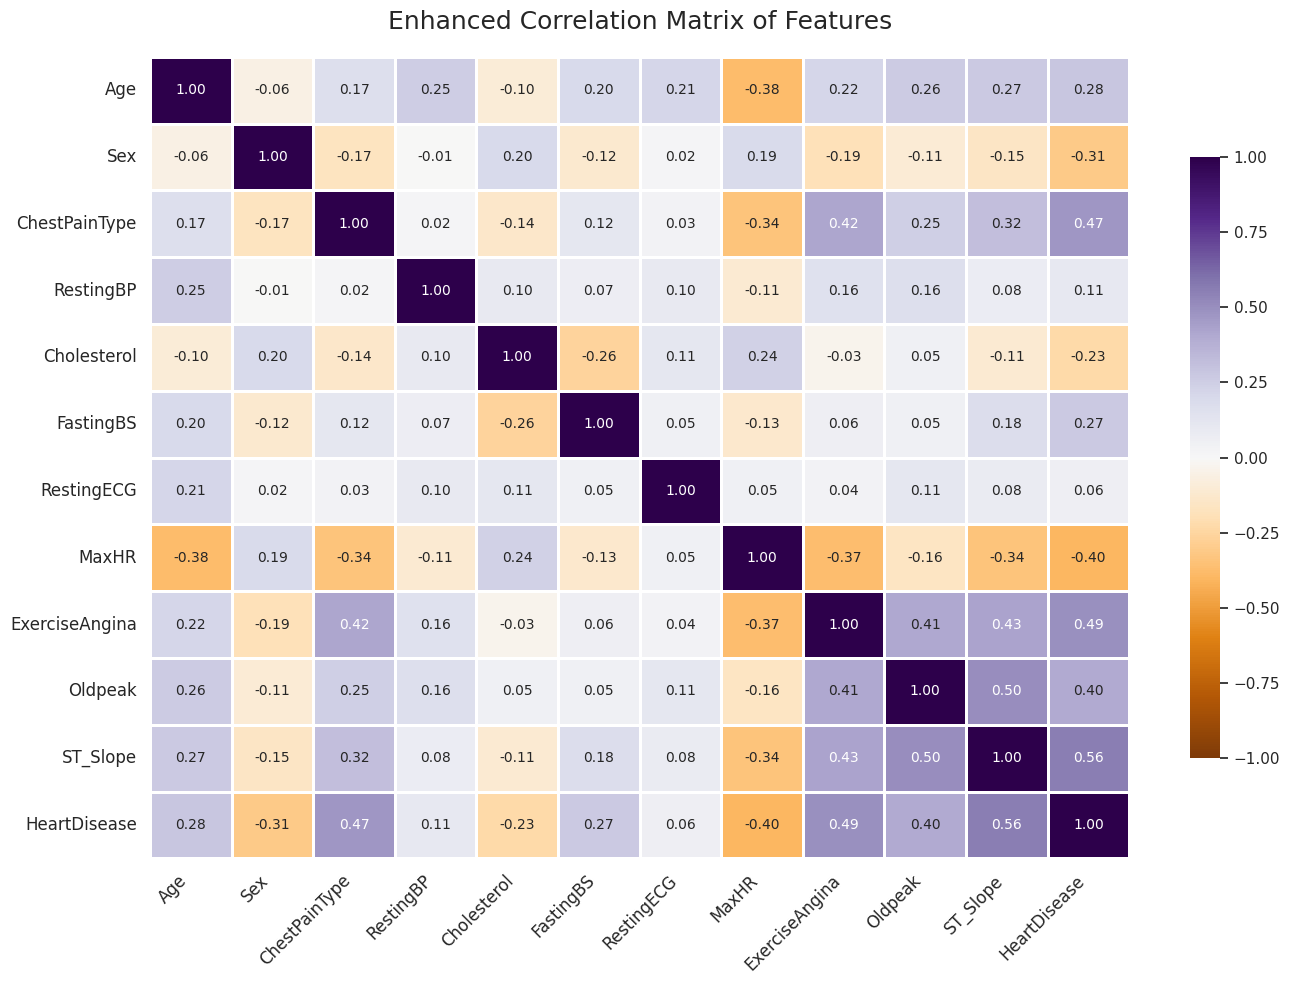

In [ ]:
# Correlation matrix to show relationships between numerical variables
plt.figure(figsize=(14, 10))  # Adjusted figure size
sns.heatmap(
    df.corr(), annot=True, cmap='PuOr', fmt='.2f', linewidths=0.8,
    linecolor='white', cbar_kws={'shrink': 0.75}, annot_kws={"size": 10},
    vmin=-1, vmax=1
)
plt.title('Enhanced Correlation Matrix of Features', fontsize=18, pad=20)  # Enhanced title for consistency
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x-tick labels and set font size
plt.yticks(fontsize=12)  # Set y-tick font size
plt.tight_layout()  # Ensure layout is tidy
plt.show()


In [ ]:
# Part 3: Splitting Data and Scaling

# Define the feature matrix X and target variable y
X = df.drop(columns=['HeartDisease'])  # Drop the target column
y = df['HeartDisease']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Part 4: Hybrid Models

# Hybrid Voting Model (Random Forest + SVM)
random_forest = RandomForestClassifier(random_state=42)
svm = SVC(probability=True, random_state=42)  # Set probability=True for soft voting

voting_model = VotingClassifier(estimators=[('rf', random_forest), ('svm', svm)], voting='soft')

# Train the hybrid voting model
voting_model.fit(X_train_scaled, y_train)

# Hybrid Stacking Model (Random Forest + XGBoost)
random_forest = RandomForestClassifier(random_state=42)
xgboost = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
meta_model = LogisticRegression(max_iter=1000, random_state=42)

stacking_model_rf_xgb = StackingClassifier(estimators=[('rf', random_forest), ('xgb', xgboost)], final_estimator=meta_model)

# Train the hybrid stacking model
stacking_model_rf_xgb.fit(X_train_scaled, y_train)

# Voting Hybrid Model (Gradient Boosting, Random Forest + SVM)
gradient_boosting = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
random_forest = RandomForestClassifier(random_state=42)
svm = SVC(probability=True, random_state=42)

voting_model_gb_rf_svm = VotingClassifier(estimators=[('gb', gradient_boosting), ('rf', random_forest), ('svm', svm)], voting='soft')

# Train the hybrid voting model
voting_model_gb_rf_svm.fit(X_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:57:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:57:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:57:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


VotingClassifier(estimators=[('gb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='logloss',
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learnin...
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svm', SVC(probability=True, random_state=42))],
                 voting='soft')


--- Evaluating: Voting Hybrid Model (RF + SVM) ---
Accuracy of Voting Hybrid Model (RF + SVM): 86.96%
Classification Report for Voting Hybrid Model (RF + SVM):
               precision    recall  f1-score   support

           0       0.84      0.84      0.84        77
           1       0.89      0.89      0.89       107

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



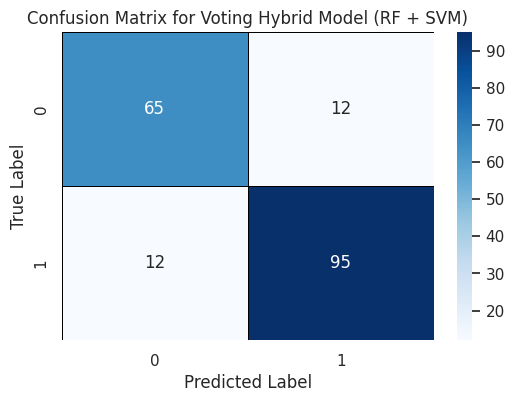

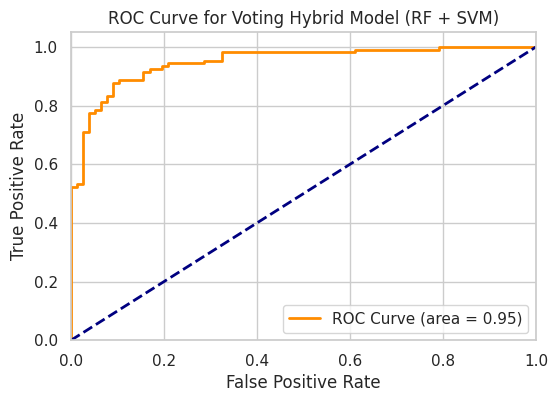


--- Evaluating: Stacking Hybrid Model (RF + XGBoost) ---


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:58:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:58:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy of Stacking Hybrid Model (RF + XGBoost): 89.13%
Classification Report for Stacking Hybrid Model (RF + XGBoost):
               precision    recall  f1-score   support

           0       0.85      0.90      0.87        77
           1       0.92      0.89      0.90       107

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184



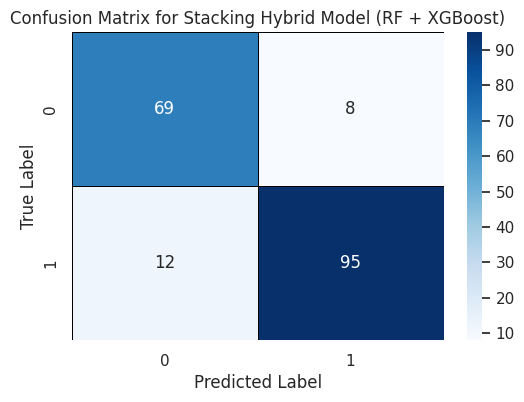

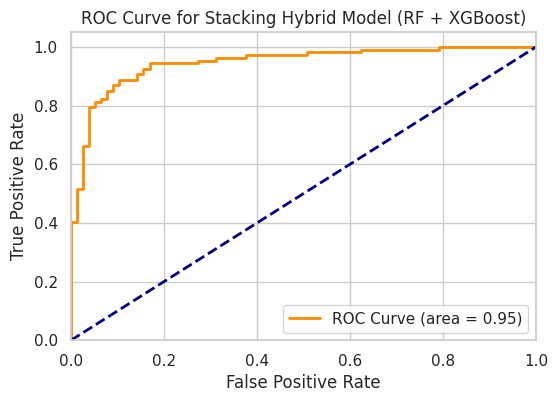


--- Evaluating: Voting Hybrid Model (GB + RF + SVM) ---


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:58:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy of Voting Hybrid Model (GB + RF + SVM): 88.59%
Classification Report for Voting Hybrid Model (GB + RF + SVM):
               precision    recall  f1-score   support

           0       0.85      0.88      0.87        77
           1       0.91      0.89      0.90       107

    accuracy                           0.89       184
   macro avg       0.88      0.89      0.88       184
weighted avg       0.89      0.89      0.89       184



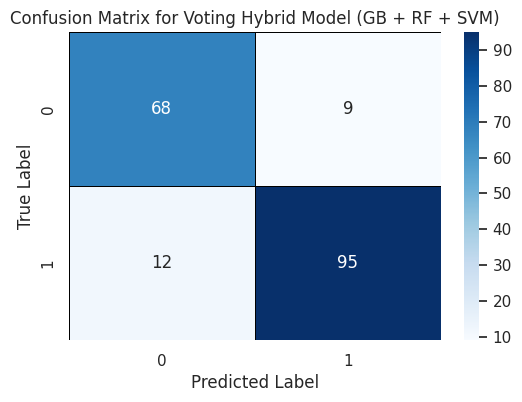

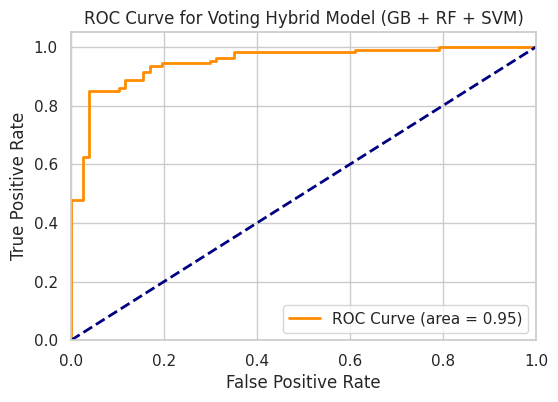


--- Evaluating: Logistic Regression ---
Accuracy of Logistic Regression: 84.24%
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.77      0.88      0.82        77
           1       0.91      0.81      0.86       107

    accuracy                           0.84       184
   macro avg       0.84      0.85      0.84       184
weighted avg       0.85      0.84      0.84       184



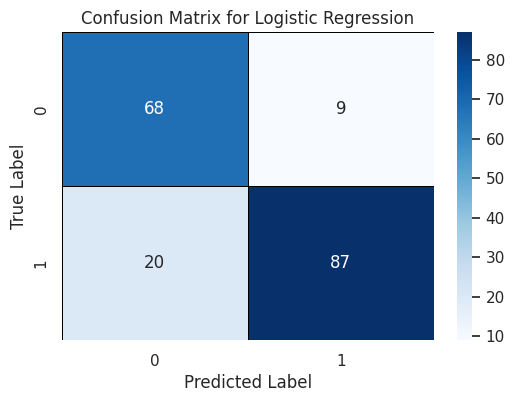

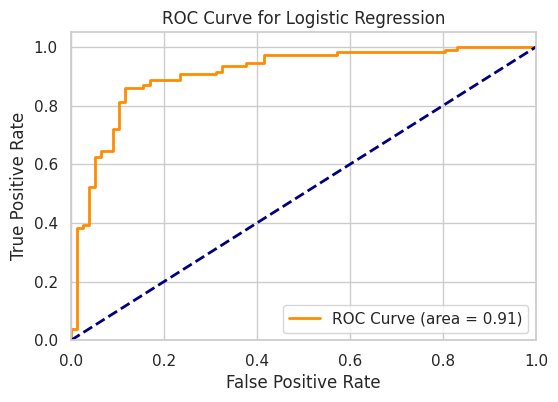


--- Evaluating: Decision Tree ---
Accuracy of Decision Tree: 79.35%
Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.72      0.83      0.77        77
           1       0.86      0.77      0.81       107

    accuracy                           0.79       184
   macro avg       0.79      0.80      0.79       184
weighted avg       0.80      0.79      0.79       184



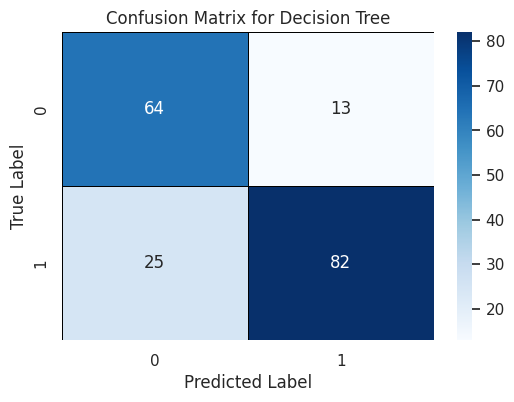

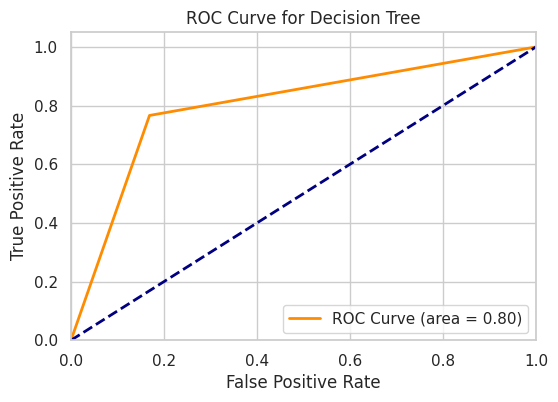


--- Evaluating: Random Forest ---
Accuracy of Random Forest: 88.04%
Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.82      0.91      0.86        77
           1       0.93      0.86      0.89       107

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.89      0.88      0.88       184



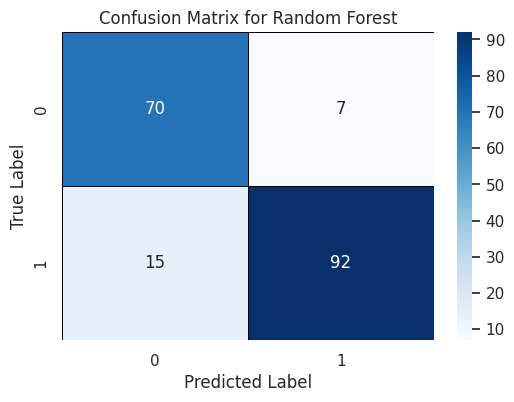

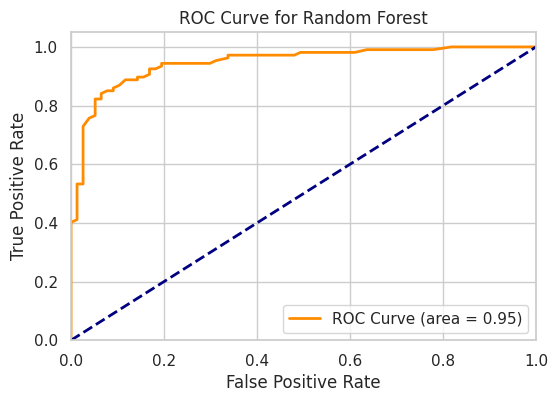


--- Evaluating: K-Nearest Neighbors ---
Accuracy of K-Nearest Neighbors: 84.78%
Classification Report for K-Nearest Neighbors:
               precision    recall  f1-score   support

           0       0.79      0.87      0.83        77
           1       0.90      0.83      0.86       107

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



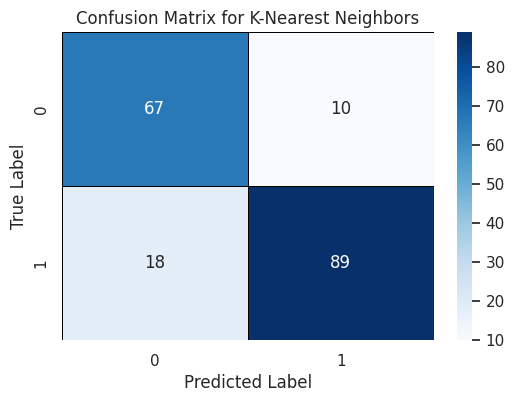

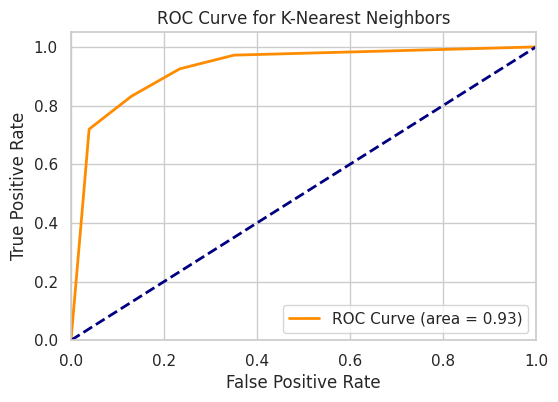


--- Evaluating: Naive Bayes ---
Accuracy of Naive Bayes: 83.70%
Classification Report for Naive Bayes:
               precision    recall  f1-score   support

           0       0.77      0.87      0.82        77
           1       0.90      0.81      0.85       107

    accuracy                           0.84       184
   macro avg       0.83      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



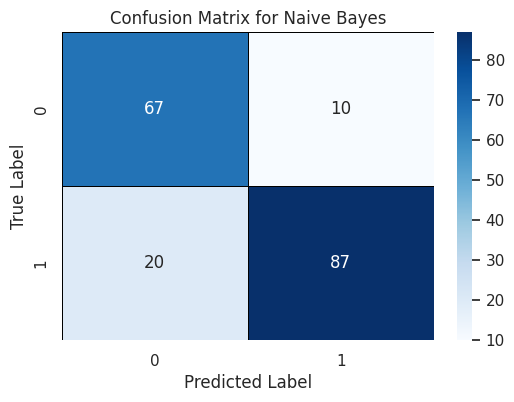

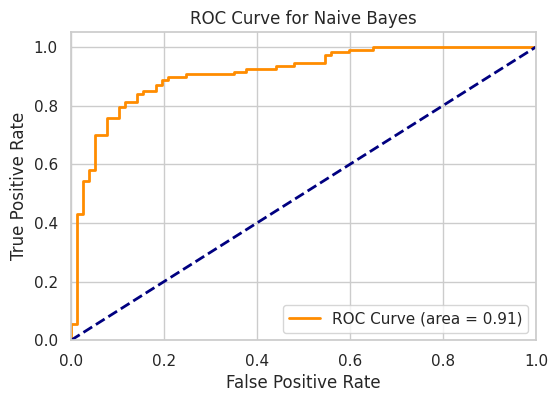


--- Evaluating: Support Vector Machine (SVM) ---
Accuracy of Support Vector Machine (SVM): 86.96%
Classification Report for Support Vector Machine (SVM):
               precision    recall  f1-score   support

           0       0.84      0.84      0.84        77
           1       0.89      0.89      0.89       107

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



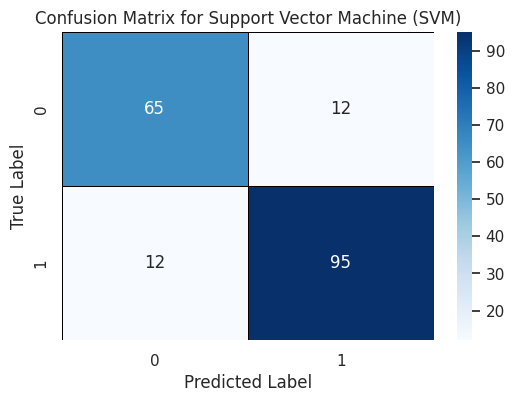

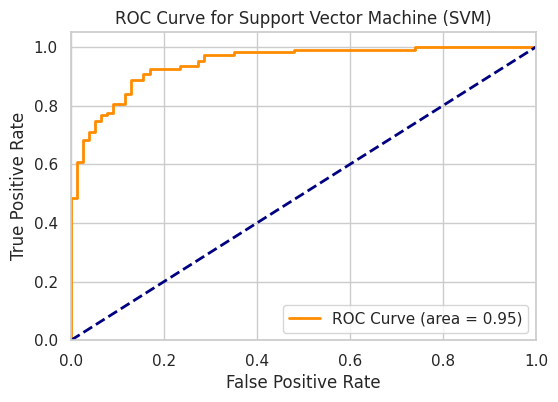

In [ ]:
# Part 5: Model Prediction and Evaluation

# List of models to evaluate
classifiers = {
    "Voting Hybrid Model (RF + SVM)": voting_model,
    "Stacking Hybrid Model (RF + XGBoost)": stacking_model_rf_xgb,
    "Voting Hybrid Model (GB + RF + SVM)": voting_model_gb_rf_svm,
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Support Vector Machine (SVM)": SVC(random_state=42)
}
from sklearn.metrics import roc_curve, auc

# Loop through each classifier and evaluate it
for name, clf in classifiers.items():
    print(f"\n--- Evaluating: {name} ---")

    # Fit the model if not already fitted
    if name != "Stacking Model (RF, DT, LR + XGBoost)":  # This model is already fitted
        clf.fit(X_train_scaled, y_train)

    # Predicting on the test set
    y_pred = clf.predict(X_test_scaled)

    # Accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy of {name}: {accuracy * 100:.2f}%")

    # Classification report
    print(f"Classification Report for {name}:\n", classification_report(y_test, y_pred))

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Plotting confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=0.5, linecolor='black')
    plt.title(f'Confusion Matrix for {name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    # ROC Curve plotting
    if hasattr(clf, "predict_proba"):  # Check if the model has predict_proba method
        y_prob = clf.predict_proba(X_test_scaled)[:, 1]  # Probability estimates for the positive class
    else:  # For SVM with no predict_proba, we can use decision function
        y_prob = clf.decision_function(X_test_scaled)

    # Convert y_test to numeric type before calling roc_curve
    y_test_numeric = y_test.astype(int)

    fpr, tpr, thresholds = roc_curve(y_test_numeric, y_prob)  # Use y_test_numeric here
    roc_auc = auc(fpr, tpr)

    # Plotting the ROC Curve
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {name}')
    plt.legend(loc="lower right")
    plt.show()


Feature ranking:
1. Feature ST_Slope (0.2330322848054321)
2. Feature Oldpeak (0.11751341072683247)
3. Feature Cholesterol (0.11111306955828743)
4. Feature MaxHR (0.10761763335116355)
5. Feature ExerciseAngina (0.10286461420358767)
6. Feature ChestPainType (0.09405149402719948)
7. Feature Age (0.08811391446054474)
8. Feature RestingBP (0.06865758547709466)
9. Feature Sex (0.032153957350477026)
10. Feature RestingECG (0.025057521201774877)
11. Feature FastingBS (0.019824514837606014)


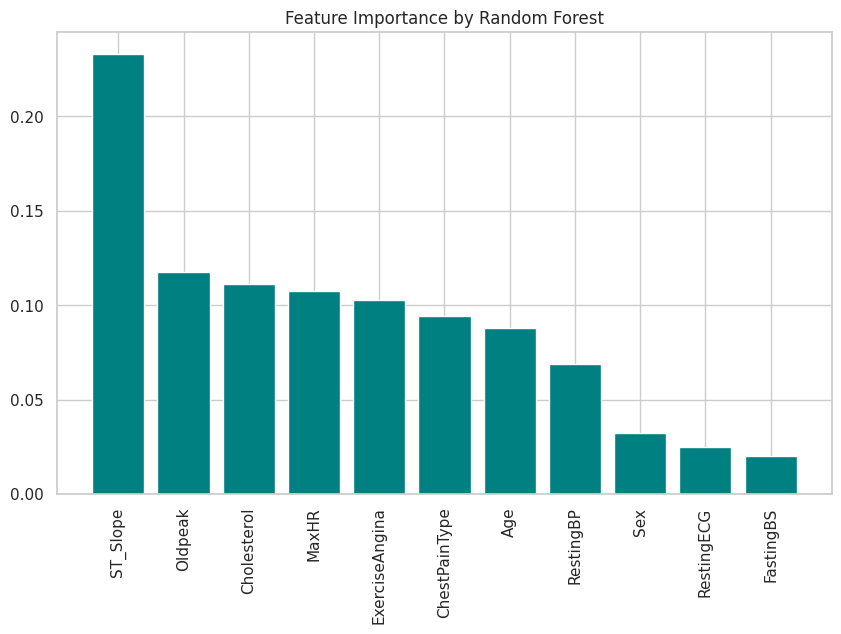

In [ ]:

# Part 6: Feature Importance using Random Forest

# Train RandomForest separately to check feature importance
random_forest.fit(X_train_scaled, y_train)

# Get feature importances from the trained RandomForest
importances = random_forest.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print(f"{f + 1}. Feature {X.columns[indices[f]]} ({importances[indices[f]]})")

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importance by Random Forest")
plt.bar(range(X.shape[1]), importances[indices], align="center", color='teal')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.show()

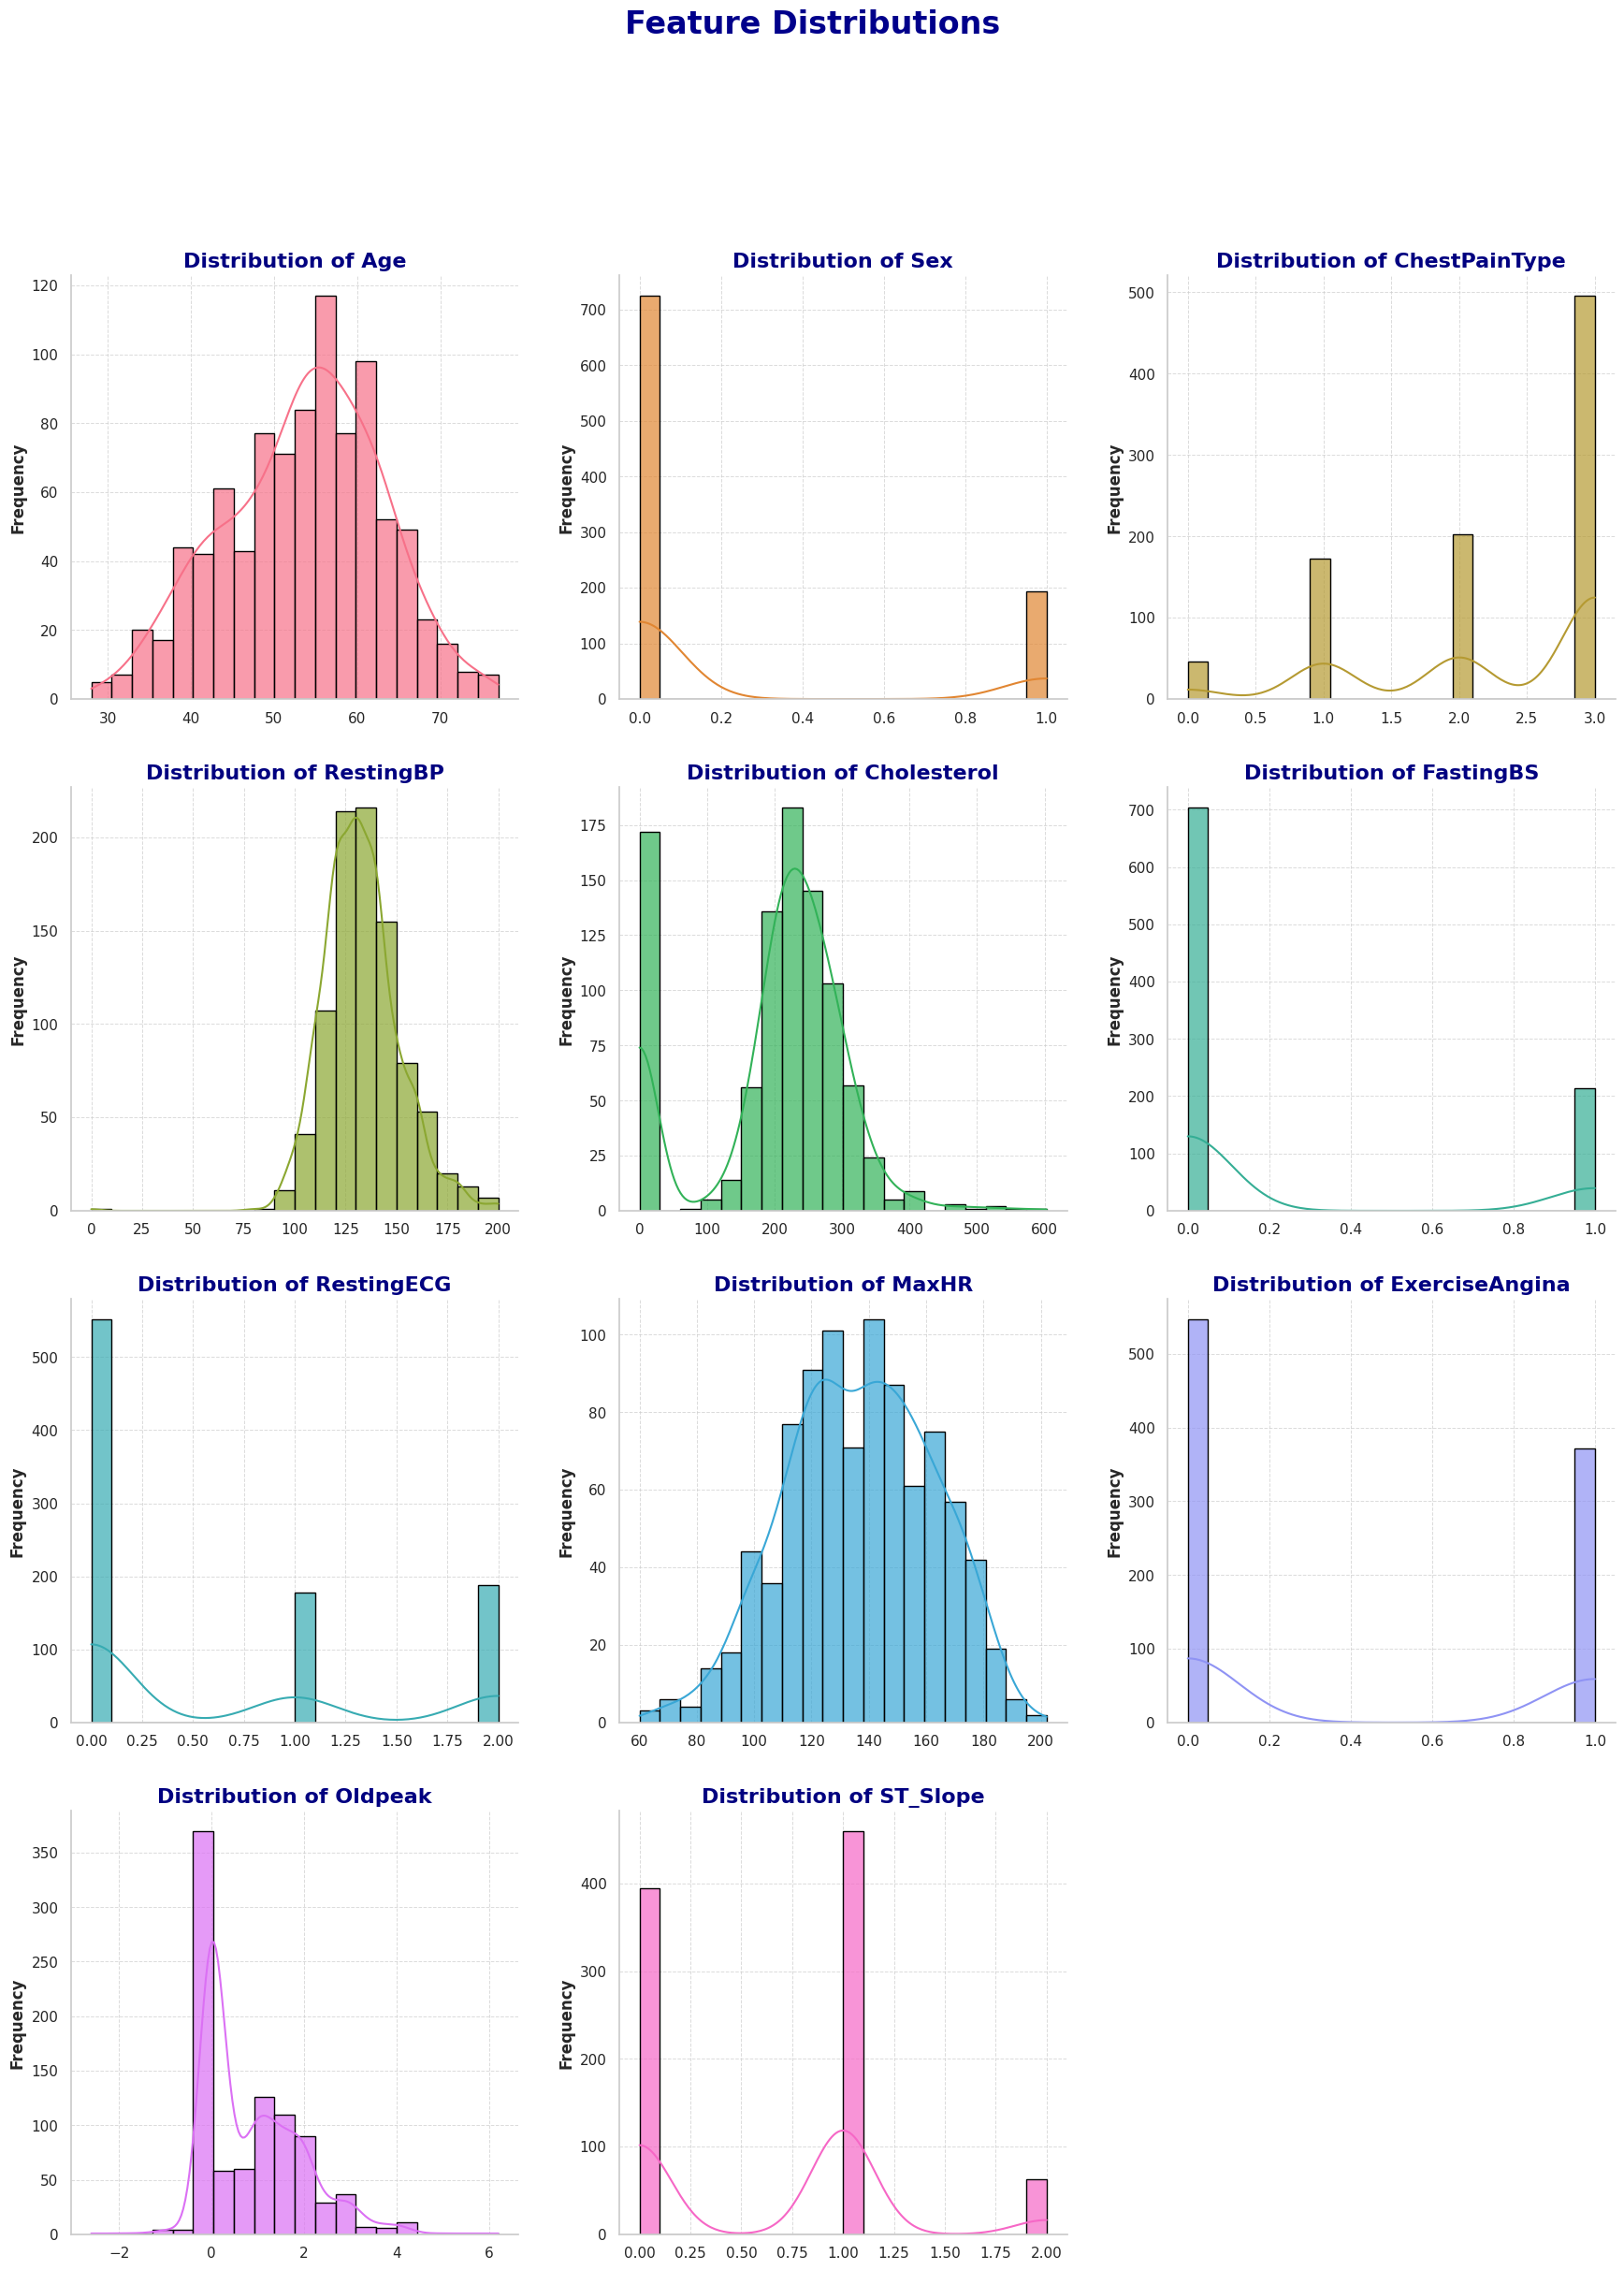

In [ ]:
# Step 5: Splitting dataset into features and target
# Assuming 'HeartDisease' is the target column
X = df.drop(columns=['HeartDisease'])  # Features
y = df['HeartDisease']  # Target

# Set a stylish theme
sns.set_theme(style="whitegrid")

# Define a color palette with enough distinct colors for all features
color_palette = sns.color_palette("husl", len(X.columns))

# Create a grid layout for the plots (adjust rows and columns to fit your features)
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 24))  # Adjust rows and columns for the number of features (11 features in total)
fig.suptitle("Feature Distributions", fontsize=24, color='darkblue', fontweight='bold', y=1.02)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each feature to plot its distribution
for i, col in enumerate(X.columns):
    sns.histplot(X[col], bins=20, kde=True, ax=axes[i], color=color_palette[i], edgecolor='black', alpha=0.7)
    axes[i].set_title(f'Distribution of {col}', fontsize=16, color='navy', fontweight='bold')
    axes[i].set_xlabel('')  # Remove x-labels for clarity
    axes[i].set_ylabel('Frequency', fontsize=12, fontweight='bold')
    axes[i].grid(True, linestyle='--', linewidth=0.7, alpha=0.7)  # Add dashed gridlines
    axes[i].spines['top'].set_visible(False)  # Remove top spine for cleaner look
    axes[i].spines['right'].set_visible(False)  # Remove right spine

# Hide any empty subplots if number of features is less than number of subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for better spacing
plt.tight_layout(pad=2.5, rect=[0, 0, 1, 0.96])
plt.show()


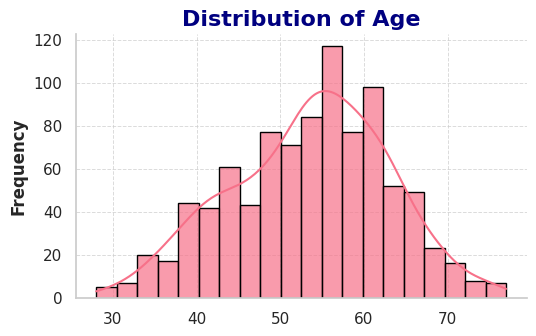

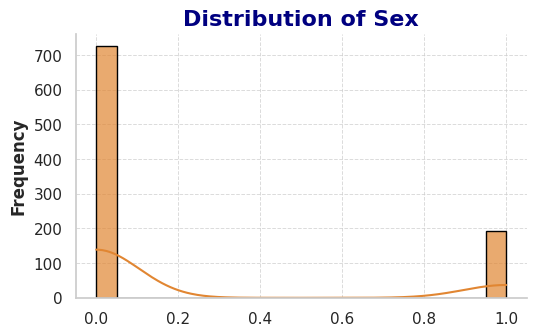

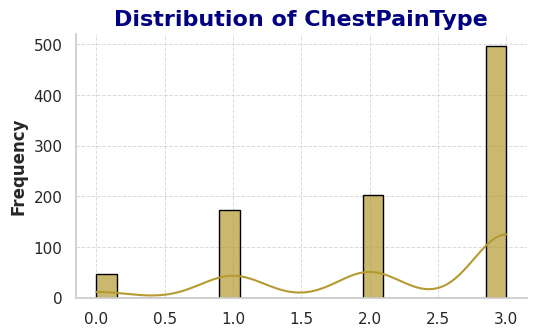

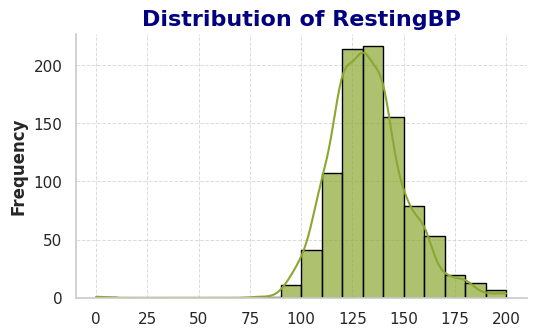

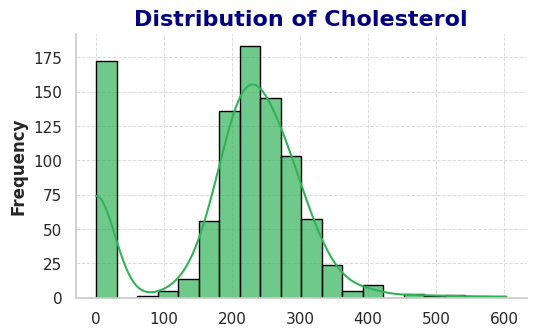

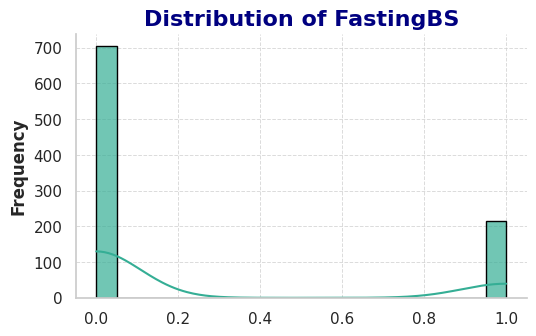

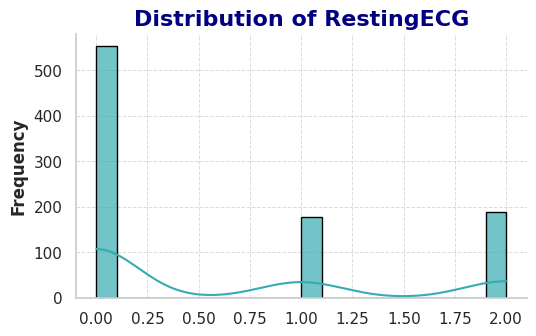

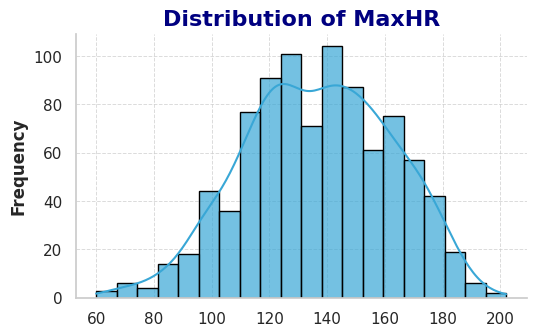

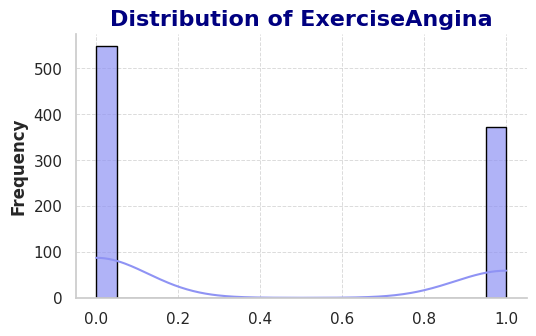

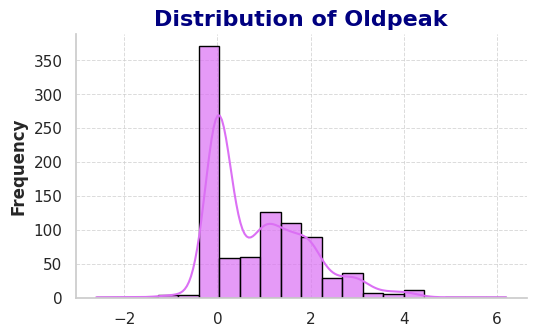

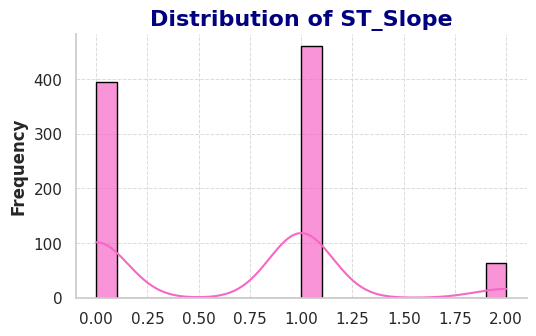

In [ ]:
# Assuming 'HeartDisease' is the target column
X = df.drop(columns=['HeartDisease'])  # Features

# Set a stylish theme
sns.set_theme(style="whitegrid")

# Define a color palette with enough distinct colors for all features
color_palette = sns.color_palette("husl", len(X.columns))

# Loop through each feature to plot its distribution individually
for i, col in enumerate(X.columns):
    plt.figure(figsize=(6, 4))  # Create a new figure for each plot
    sns.histplot(X[col], bins=20, kde=True, color=color_palette[i], edgecolor='black', alpha=0.7)
    plt.title(f'Distribution of {col}', fontsize=16, color='navy', fontweight='bold')
    plt.xlabel('')  # Remove x-labels for clarity
    plt.ylabel('Frequency', fontsize=12, fontweight='bold')
    plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)  # Add dashed gridlines
    plt.gca().spines['top'].set_visible(False)  # Remove top spine for cleaner look
    plt.gca().spines['right'].set_visible(False)  # Remove right spine
    plt.tight_layout(pad=2.5)

    # Save each figure as an image file
    plt.savefig(f'feature_distribution_{col}.png')  # Saves each plot as a separate PNG file

    plt.show()  # Show the plot


Voting Hybrid Model (RF + SVM) Train Accuracy: 0.9387
Voting Hybrid Model (RF + SVM) Test Accuracy: 0.8696


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:58:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:58:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Stacking Hybrid Model (RF + XGBoost) Train Accuracy: 1.0000
Stacking Hybrid Model (RF + XGBoost) Test Accuracy: 0.8913


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:58:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Voting Hybrid Model (GB + RF + SVM) Train Accuracy: 0.9986
Voting Hybrid Model (GB + RF + SVM) Test Accuracy: 0.8859
Logistic Regression Train Accuracy: 0.8597
Logistic Regression Test Accuracy: 0.8424
Decision Tree Train Accuracy: 1.0000
Decision Tree Test Accuracy: 0.7935
Random Forest Train Accuracy: 1.0000
Random Forest Test Accuracy: 0.8804
K-Nearest Neighbors Train Accuracy: 0.8801
K-Nearest Neighbors Test Accuracy: 0.8478
Naive Bayes Train Accuracy: 0.8638
Naive Bayes Test Accuracy: 0.8370
Support Vector Machine (SVM) Train Accuracy: 0.8965
Support Vector Machine (SVM) Test Accuracy: 0.8696


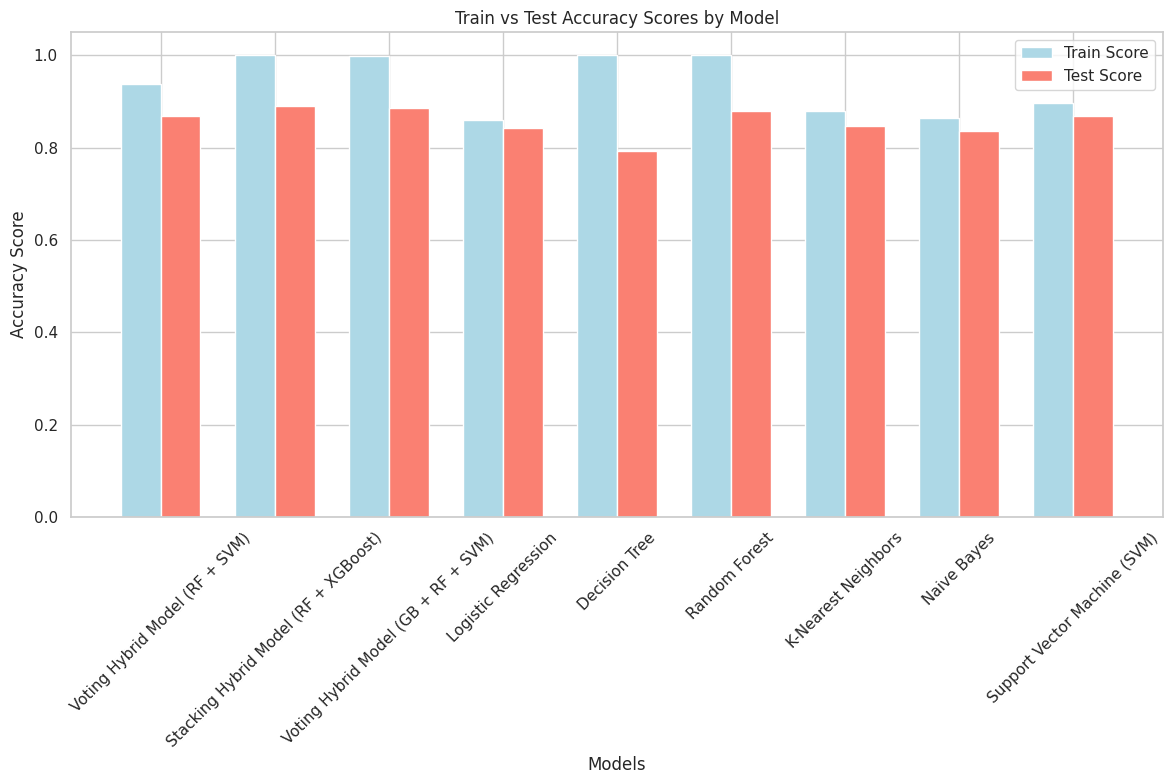

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score

# Initialize dictionaries to store train and test accuracies
train_scores = {}
test_scores = {}

# Define function to evaluate train and test scores for each model
def evaluate_train_test_scores(model, model_name):
    # Fit the model on the training data
    model.fit(X_train_scaled, y_train)

    # Calculate accuracy for training data
    y_train_pred = model.predict(X_train_scaled)
    train_accuracy = accuracy_score(y_train, y_train_pred)

    # Calculate accuracy for testing data
    y_test_pred = model.predict(X_test_scaled)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Store the scores in the dictionaries
    train_scores[model_name] = train_accuracy
    test_scores[model_name] = test_accuracy

    print(f"{model_name} Train Accuracy: {train_accuracy:.4f}")
    print(f"{model_name} Test Accuracy: {test_accuracy:.4f}")

# Evaluate models and compute scores for the models you defined earlier
for model_name, model in classifiers.items():
    evaluate_train_test_scores(model, model_name)

# Plot the train vs test scores
def plot_train_test_scores(train_scores, test_scores):
    # Create arrays for model names, train, and test scores
    model_names = list(train_scores.keys())
    train_values = list(train_scores.values())
    test_values = list(test_scores.values())

    # Set figure size
    plt.figure(figsize=(12, 8))

    # Bar width and positions for the bars
    bar_width = 0.35
    index = np.arange(len(model_names))

    # Plot bars for train and test scores
    train_bar = plt.bar(index, train_values, bar_width, label='Train Score', color='lightblue')
    test_bar = plt.bar(index + bar_width, test_values, bar_width, label='Test Score', color='salmon')

    # Add labels and title
    plt.xlabel('Models')
    plt.ylabel('Accuracy Score')
    plt.title('Train vs Test Accuracy Scores by Model')
    plt.xticks(index + bar_width / 2, model_names, rotation=45)
    plt.legend()

    # Display the plot
    plt.tight_layout()
    plt.show()

# Plot the train vs test accuracy scores
plot_train_test_scores(train_scores, test_scores)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:58:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:58:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:58:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:58:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
<ipython-input-35-fd8522337dd3>:98: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the 

<Figure size 1200x800 with 0 Axes>

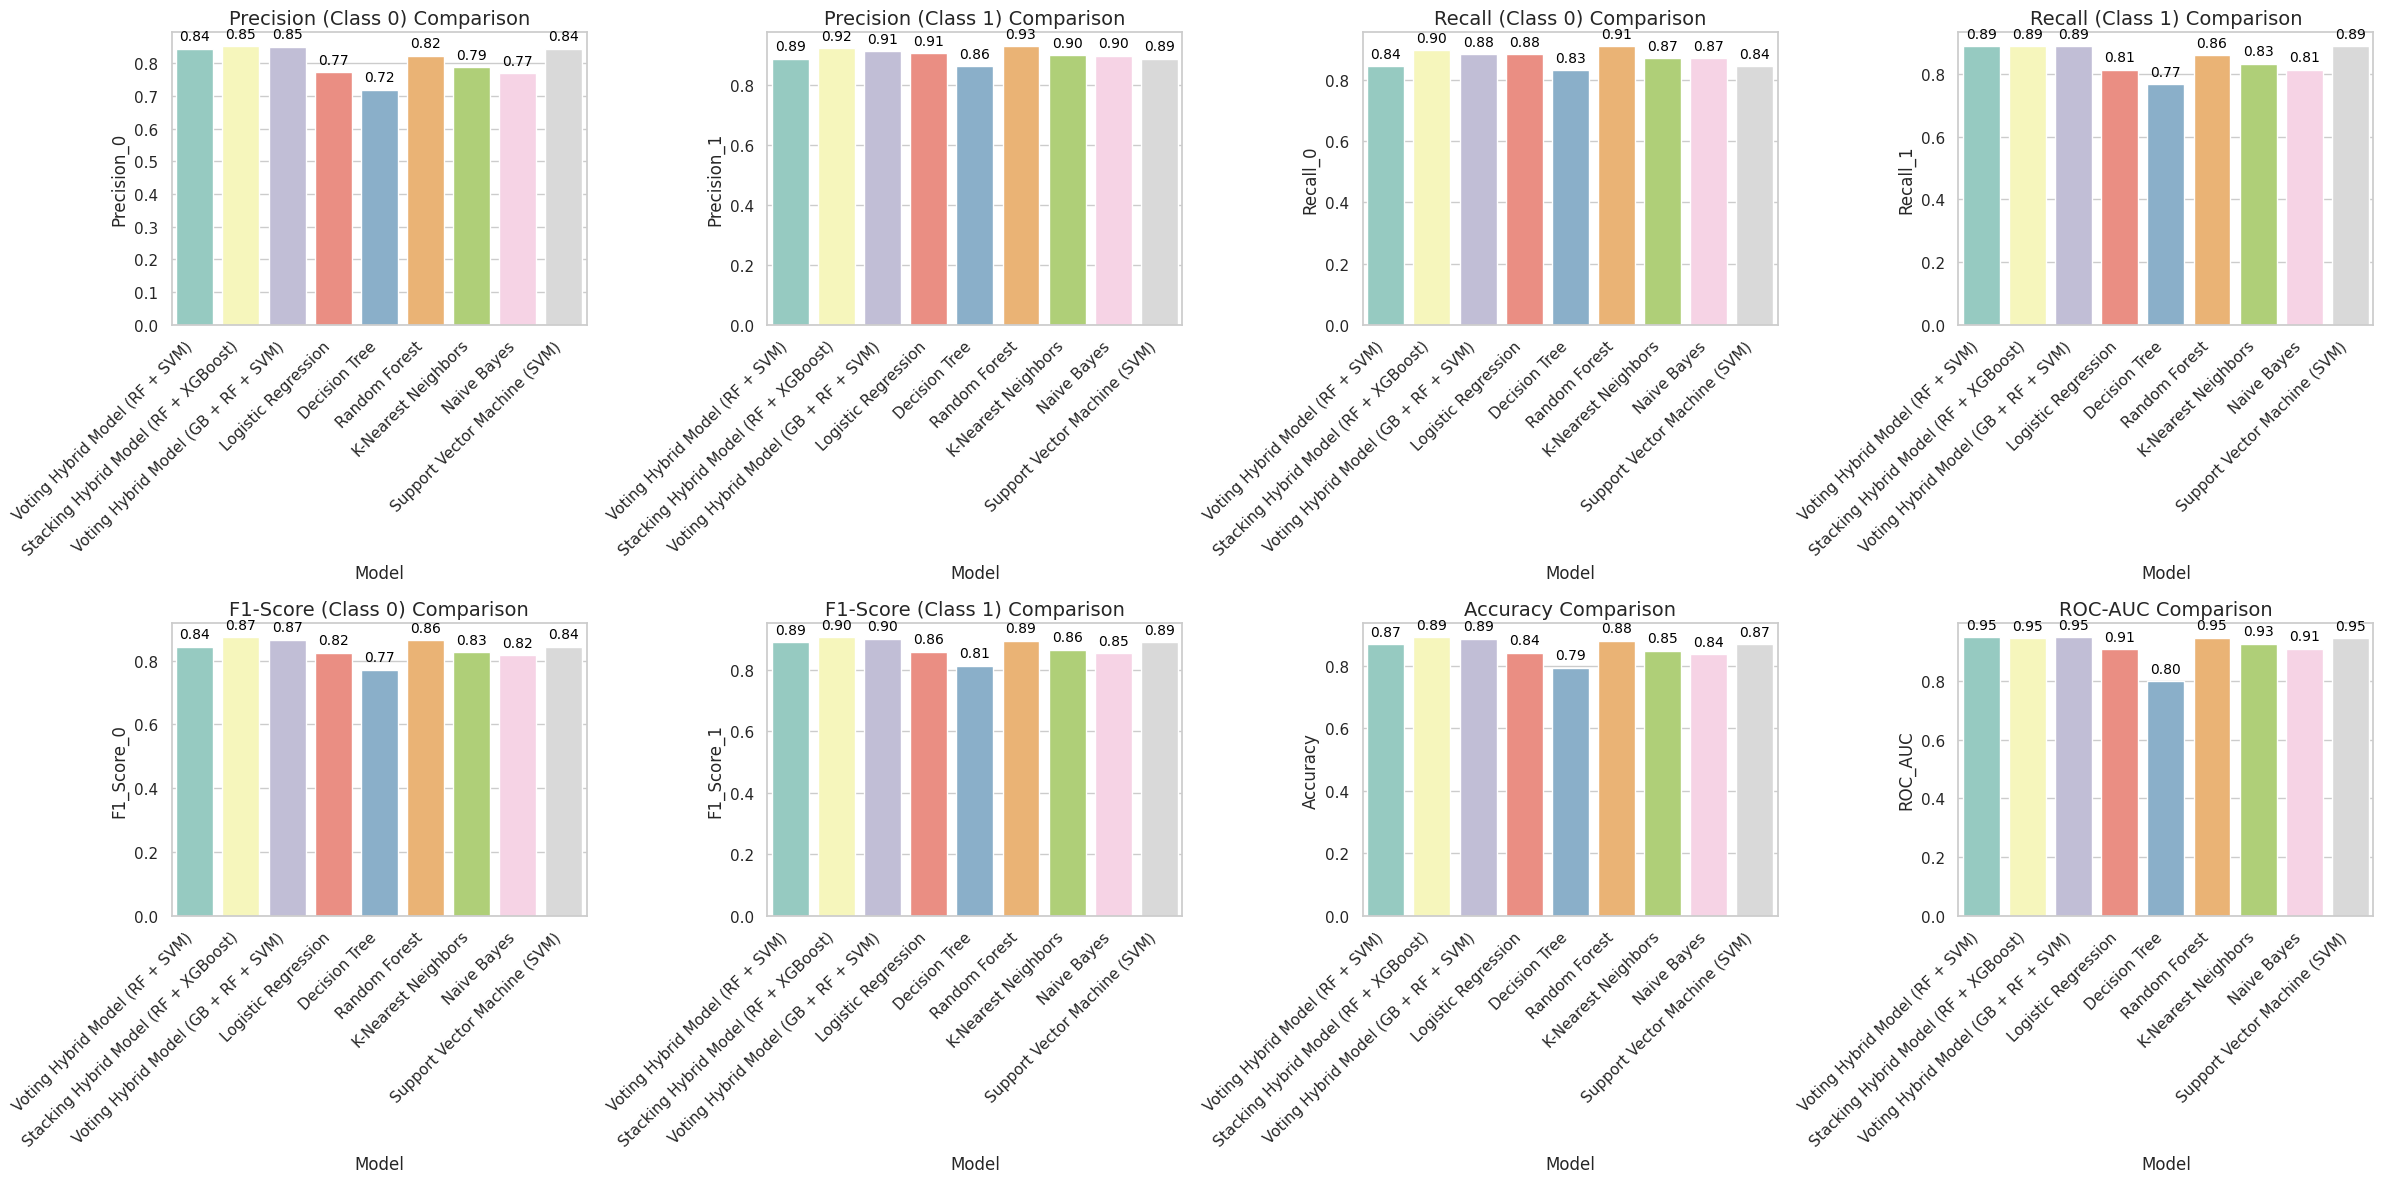

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# List of all classifiers from your primary code
classifiers = {
    "Voting Hybrid Model (RF + SVM)": voting_model,
    "Stacking Hybrid Model (RF + XGBoost)": stacking_model_rf_xgb,
    "Voting Hybrid Model (GB + RF + SVM)": voting_model_gb_rf_svm,
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Support Vector Machine (SVM)": SVC(random_state=42, probability=True)
}

# Initialize lists to store metrics
models = []
precision_0 = []
precision_1 = []
recall_0 = []
recall_1 = []
f1_0 = []
f1_1 = []
accuracy = []
roc_auc = []

# Loop through classifiers to calculate metrics
for name, model in classifiers.items():
    # Fit the model
    model.fit(X_train_scaled, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test_scaled)

    # Get classification report as a dictionary
    report = classification_report(y_test, y_pred, output_dict=True)

    # Append model name and metrics
    models.append(name)
    precision_0.append(report['0']['precision'])
    precision_1.append(report['1']['precision'])
    recall_0.append(report['0']['recall'])
    recall_1.append(report['1']['recall'])
    f1_0.append(report['0']['f1-score'])
    f1_1.append(report['1']['f1-score'])
    accuracy.append(accuracy_score(y_test, y_pred))

    # Calculate ROC-AUC if possible
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test_scaled)[:, 1]
        roc_auc.append(roc_auc_score(y_test, y_prob))
    elif hasattr(model, "decision_function"):
        y_prob = model.decision_function(X_test_scaled)
        roc_auc.append(roc_auc_score(y_test, y_prob))
    else:
        roc_auc.append(None)  # Not available for this model

# Data for the DataFrame
data = {
    "Model": models,
    "Precision_0": precision_0,
    "Precision_1": precision_1,
    "Recall_0": recall_0,
    "Recall_1": recall_1,
    "F1_Score_0": f1_0,
    "F1_Score_1": f1_1,
    "Accuracy": accuracy,
    "ROC_AUC": roc_auc,
}

# Convert the dictionary into a DataFrame
df = pd.DataFrame(data)

# Define figure size
plt.figure(figsize=(12, 8))

# Set up the color palette for each model
colors = sns.color_palette("Set3", len(df))

# Metrics to plot
metrics = ["Precision_0", "Precision_1", "Recall_0", "Recall_1", "F1_Score_0", "F1_Score_1", "Accuracy", "ROC_AUC"]
metric_labels = ["Precision (Class 0)", "Precision (Class 1)", "Recall (Class 0)", "Recall (Class 1)",
                 "F1-Score (Class 0)", "F1-Score (Class 1)", "Accuracy", "ROC-AUC"]

# Create subplots
fig, axs = plt.subplots(2, 4, figsize=(24, 12))  # Two rows, 4 columns of subplots

# Flatten the axes array for easy iteration
axs = axs.flatten()

for i, metric in enumerate(metrics):
    ax = axs[i]

    # Barplot
    sns.barplot(x="Model", y=metric, data=df, palette=colors, ax=ax)

    # Set title
    ax.set_title(f'{metric_labels[i]} Comparison', fontsize=14)

    # Display values on the bars
    for p in ax.patches:
        if pd.notna(p.get_height()):
            ax.annotate(f'{p.get_height():.2f}',
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', xytext=(0, 9),
                        textcoords='offset points', fontsize=10, color='black')

    # Rotate x-labels for better readability
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

# Adjust the layout for better spacing between subplots
plt.tight_layout()
plt.show()


<ipython-input-36-d28ea0b2008f>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=df, palette=colors)


<Figure size 1200x800 with 0 Axes>

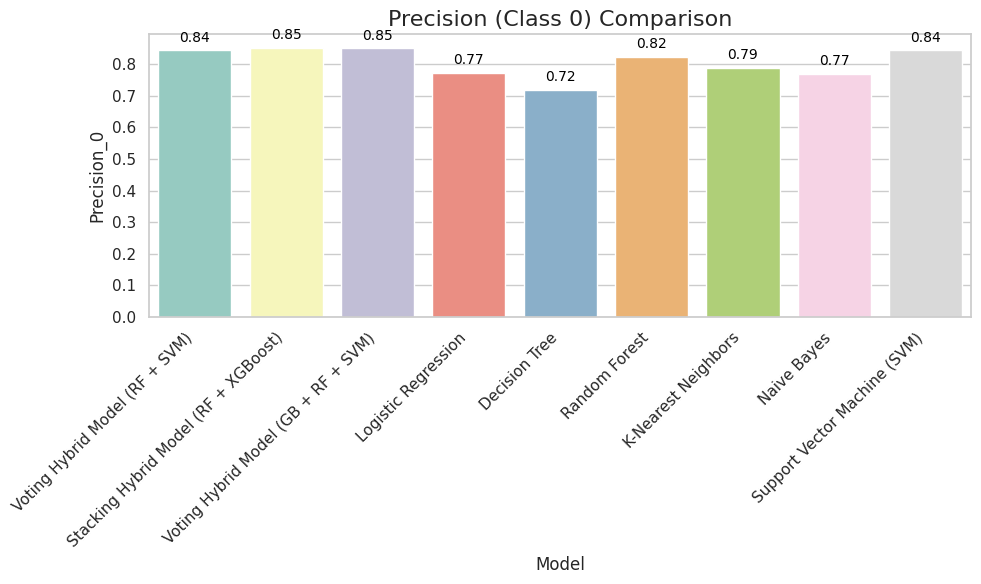

<ipython-input-36-d28ea0b2008f>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=df, palette=colors)


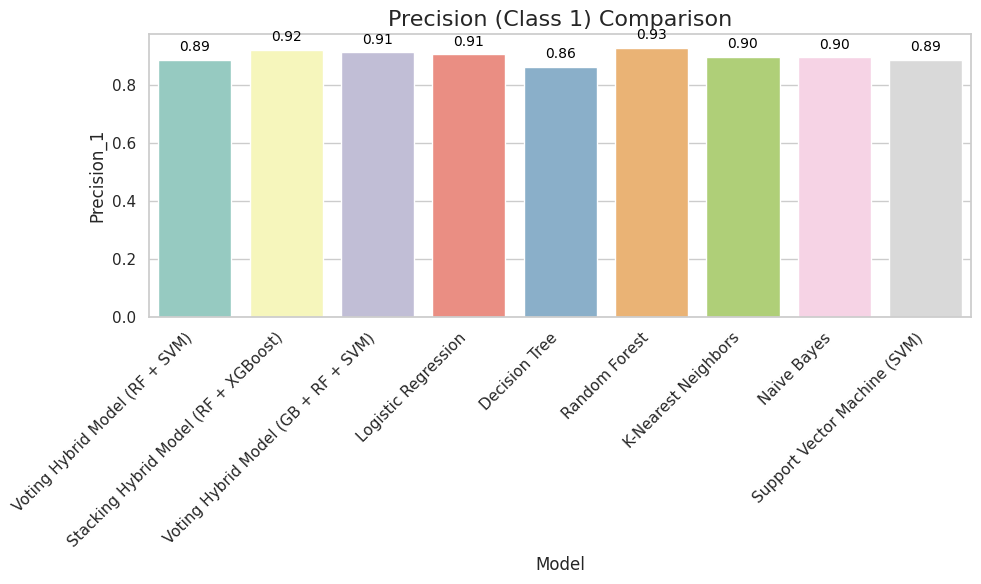

<ipython-input-36-d28ea0b2008f>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=df, palette=colors)


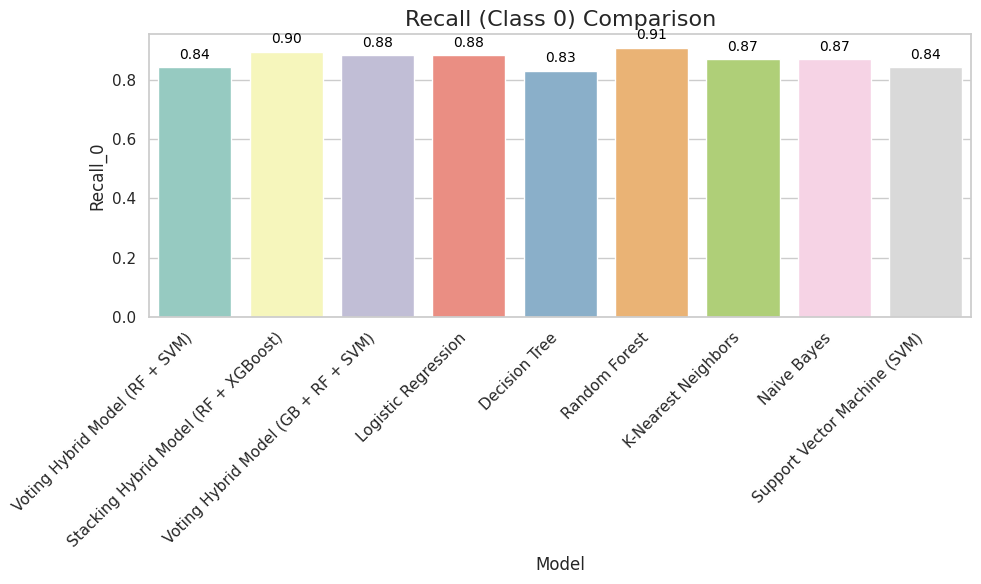

<ipython-input-36-d28ea0b2008f>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=df, palette=colors)


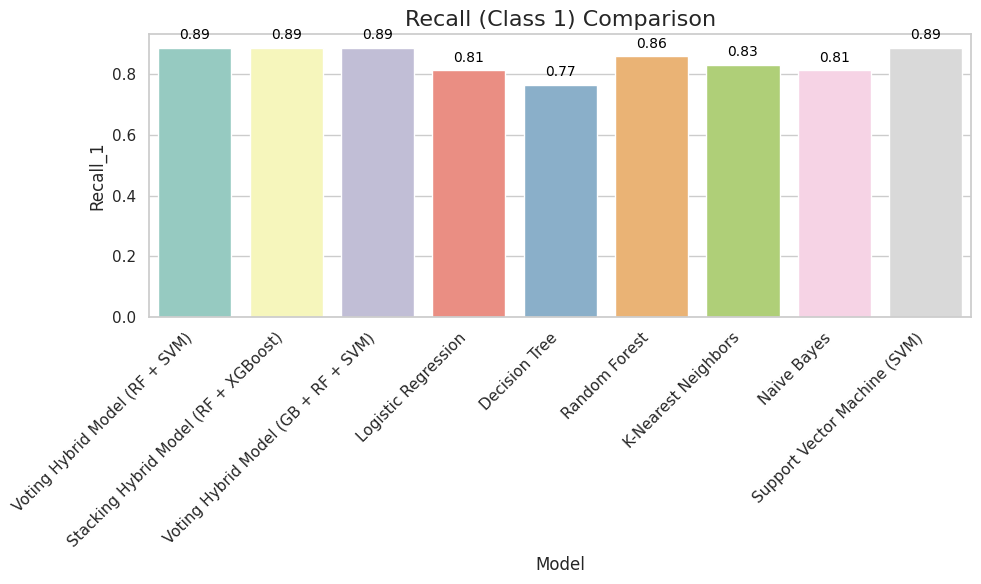

<ipython-input-36-d28ea0b2008f>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=df, palette=colors)


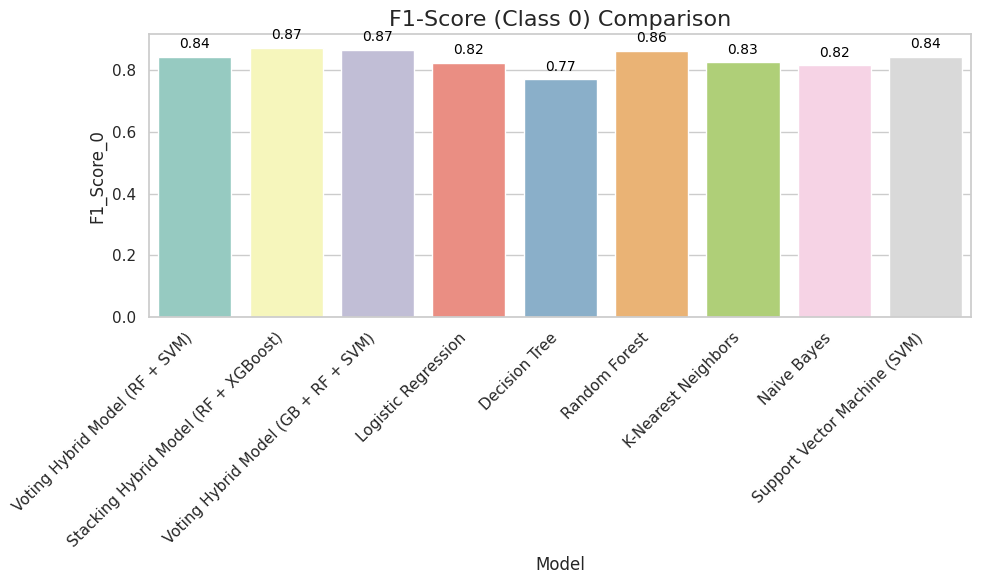

<ipython-input-36-d28ea0b2008f>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=df, palette=colors)


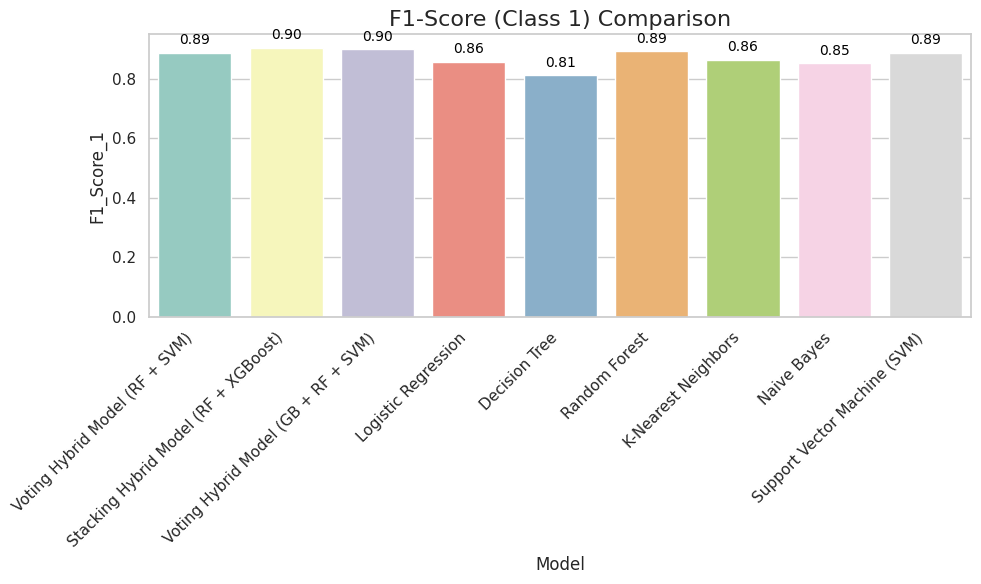

<ipython-input-36-d28ea0b2008f>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=df, palette=colors)


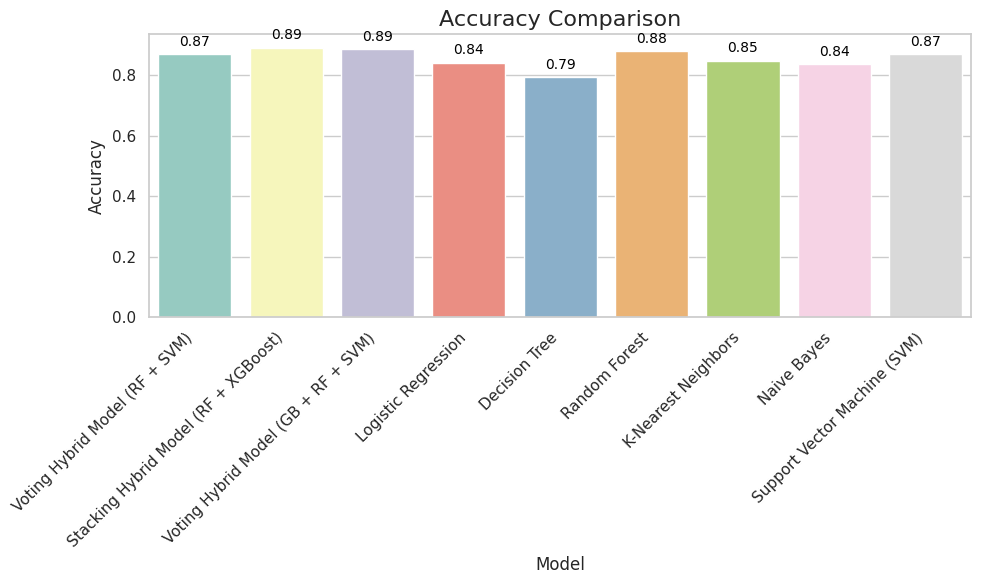

<ipython-input-36-d28ea0b2008f>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=df, palette=colors)


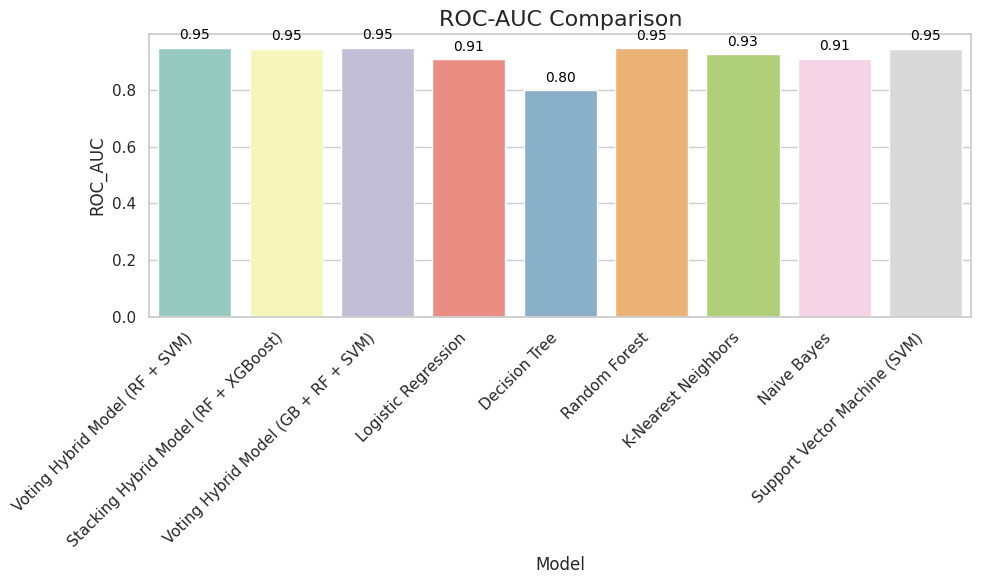

In [ ]:
# Define figure size for each individual plot
plt.figure(figsize=(12, 8))

# Set up the color palette for each model
colors = sns.color_palette("Set3", len(df))

# Metrics to plot
metrics = ["Precision_0", "Precision_1", "Recall_0", "Recall_1", "F1_Score_0", "F1_Score_1", "Accuracy", "ROC_AUC"]
metric_labels = ["Precision (Class 0)", "Precision (Class 1)", "Recall (Class 0)", "Recall (Class 1)",
                 "F1-Score (Class 0)", "F1-Score (Class 1)", "Accuracy", "ROC-AUC"]

# Loop through each metric to create individual plots
for i, metric in enumerate(metrics):
    plt.figure(figsize=(10, 6))  # Create a new figure for each plot

    # Barplot for the current metric
    sns.barplot(x="Model", y=metric, data=df, palette=colors)

    # Set the title and axis labels
    plt.title(f'{metric_labels[i]} Comparison', fontsize=16)

    # Display values on the bars
    for p in plt.gca().patches:
        if pd.notna(p.get_height()):
            plt.gca().annotate(f'{p.get_height():.2f}',
                               (p.get_x() + p.get_width() / 2., p.get_height()),
                               ha='center', va='center', xytext=(0, 9),
                               textcoords='offset points', fontsize=10, color='black')

    # Rotate x-labels for better readability
    plt.xticks(rotation=45, horizontalalignment='right')

    # Display the plot
    plt.tight_layout()
    plt.show()  # Show each plot individually


                                  Model  Accuracy  Precision    Recall  \
0        Voting Hybrid Model (RF + SVM)  0.869565   0.869565  0.869565   
1  Stacking Hybrid Model (RF + XGBoost)  0.891304   0.892836  0.891304   
2   Voting Hybrid Model (GB + RF + SVM)  0.885870   0.886904  0.885870   
3                   Logistic Regression  0.842391   0.850374  0.842391   
4                         Decision Tree  0.793478   0.802873  0.793478   
5                         Random Forest  0.880435   0.885033  0.880435   
6                   K-Nearest Neighbors  0.847826   0.852642  0.847826   
7                           Naive Bayes  0.836957   0.843847  0.836957   
8          Support Vector Machine (SVM)  0.869565   0.869565  0.869565   

   F1-Score   ROC-AUC  
0  0.869565  0.949144  
1  0.891645  0.946474  
2  0.886149  0.948416  
3  0.843375  0.907877  
4  0.794809  0.798762  
5  0.881065  0.946838  
6  0.848629  0.926872  
7  0.837931  0.909698  
8  0.869565  0.945139  


<ipython-input-37-7759e488a666>:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=metrics_df, palette=colors, ax=ax)
<ipython-input-37-7759e488a666>:81: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-37-7759e488a666>:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=metrics_df, palette=colors, ax=ax)
<ipython-input-37-7759e488a666>:81: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-37-7759e488a666>:68: FutureWarning: 

P

<Figure size 1400x1000 with 0 Axes>

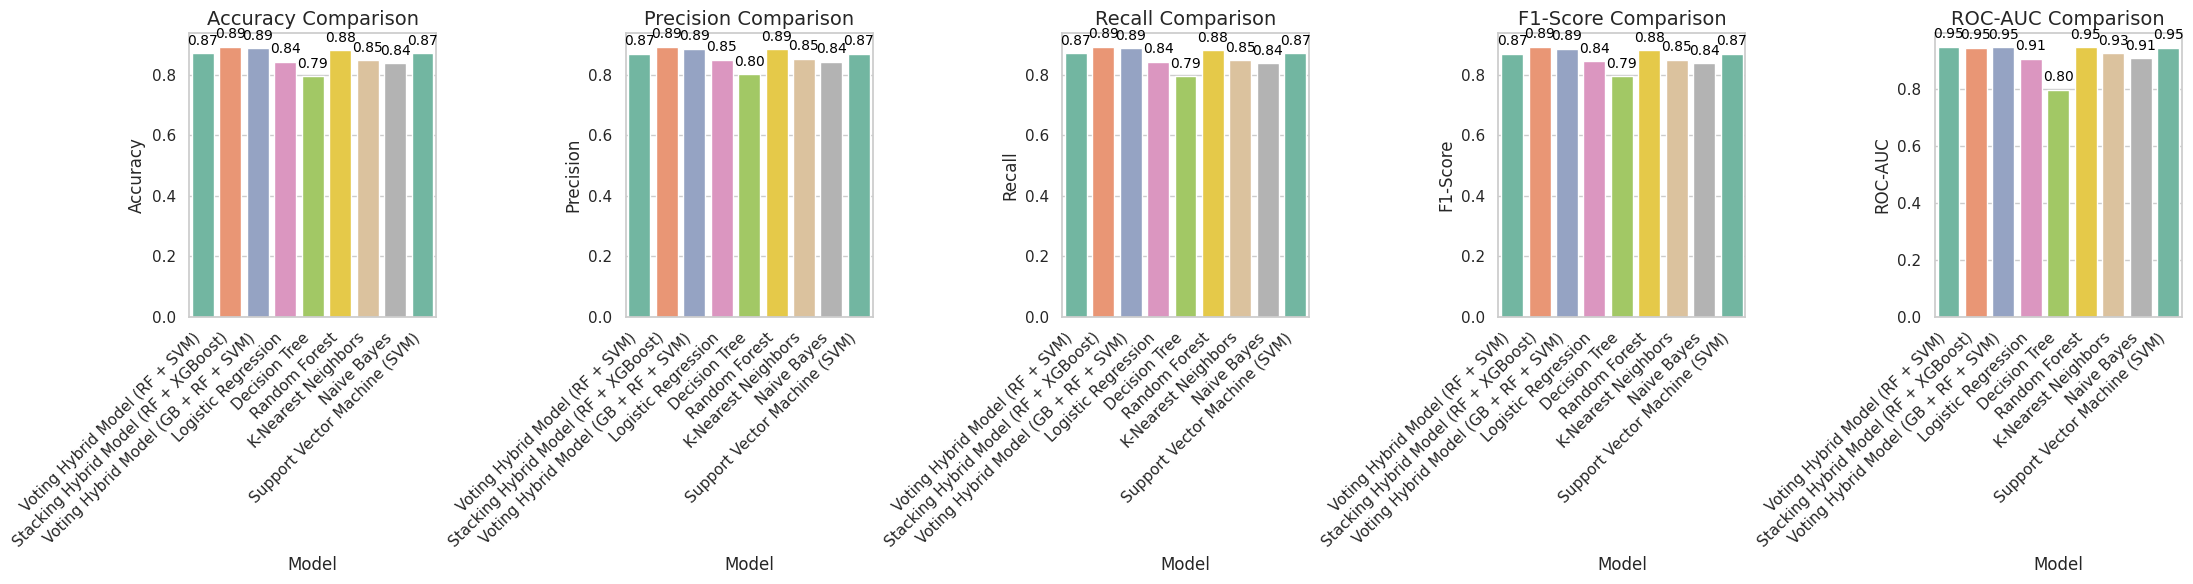

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, roc_curve

# Initialize lists to store metrics for each model
model_names = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []

# Loop through each model in your classifier dictionary (from the previous code)
for model_name, model in classifiers.items():
    # Predict probabilities for ROC-AUC (use predict_proba or decision_function)
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test_scaled)[:, 1]  # Get probability for positive class
    else:
        y_prob = model.decision_function(X_test_scaled)  # For SVM

    # Get predictions
    y_pred = model.predict(X_test_scaled)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')  # Weighted for multi-class
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    roc_auc = roc_auc_score(y_test, y_prob) if hasattr(model, "predict_proba") or hasattr(model, "decision_function") else "N/A"

    # Append the results to the lists
    model_names.append(model_name)
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    roc_auc_scores.append(roc_auc)

# Create a DataFrame with the metrics
metrics_df = pd.DataFrame({
    "Model": model_names,
    "Accuracy": accuracy_scores,
    "Precision": precision_scores,
    "Recall": recall_scores,
    "F1-Score": f1_scores,
    "ROC-AUC": roc_auc_scores
})

# Display the DataFrame
print(metrics_df)

# Plot the comparison of all metrics
metrics = ["Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC"]
metric_labels = ["Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC"]

# Define figure size and color palette
plt.figure(figsize=(14, 10))
colors = sns.color_palette("Set2", len(metrics_df))

# Create subplots for each metric
fig, axs = plt.subplots(1, 5, figsize=(22, 6))

for i, metric in enumerate(metrics):
    ax = axs[i]

    # Plot a barplot for each metric
    sns.barplot(x="Model", y=metric, data=metrics_df, palette=colors, ax=ax)

    # Set title for each subplot
    ax.set_title(f'{metric_labels[i]} Comparison', fontsize=14)

    # Display the values on the bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 9),
                    textcoords='offset points', fontsize=10, color='black')

    # Rotate the x-axis labels for better readability
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()



--- Evaluating: Voting Hybrid Model (RF + SVM) ---
Accuracy of Voting Hybrid Model (RF + SVM): 86.96%
Classification Report for Voting Hybrid Model (RF + SVM):
               precision    recall  f1-score   support

           0       0.84      0.84      0.84        77
           1       0.89      0.89      0.89       107

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184


--- Evaluating: Stacking Hybrid Model (RF + XGBoost) ---


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:58:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:58:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy of Stacking Hybrid Model (RF + XGBoost): 89.13%
Classification Report for Stacking Hybrid Model (RF + XGBoost):
               precision    recall  f1-score   support

           0       0.85      0.90      0.87        77
           1       0.92      0.89      0.90       107

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184


--- Evaluating: Voting Hybrid Model (GB + RF + SVM) ---


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:58:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy of Voting Hybrid Model (GB + RF + SVM): 88.59%
Classification Report for Voting Hybrid Model (GB + RF + SVM):
               precision    recall  f1-score   support

           0       0.85      0.88      0.87        77
           1       0.91      0.89      0.90       107

    accuracy                           0.89       184
   macro avg       0.88      0.89      0.88       184
weighted avg       0.89      0.89      0.89       184


--- Evaluating: Logistic Regression ---
Accuracy of Logistic Regression: 84.24%
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.77      0.88      0.82        77
           1       0.91      0.81      0.86       107

    accuracy                           0.84       184
   macro avg       0.84      0.85      0.84       184
weighted avg       0.85      0.84      0.84       184


--- Evaluating: Decision Tree ---
Accuracy of Decision Tree: 79.35%
Classification Report for De

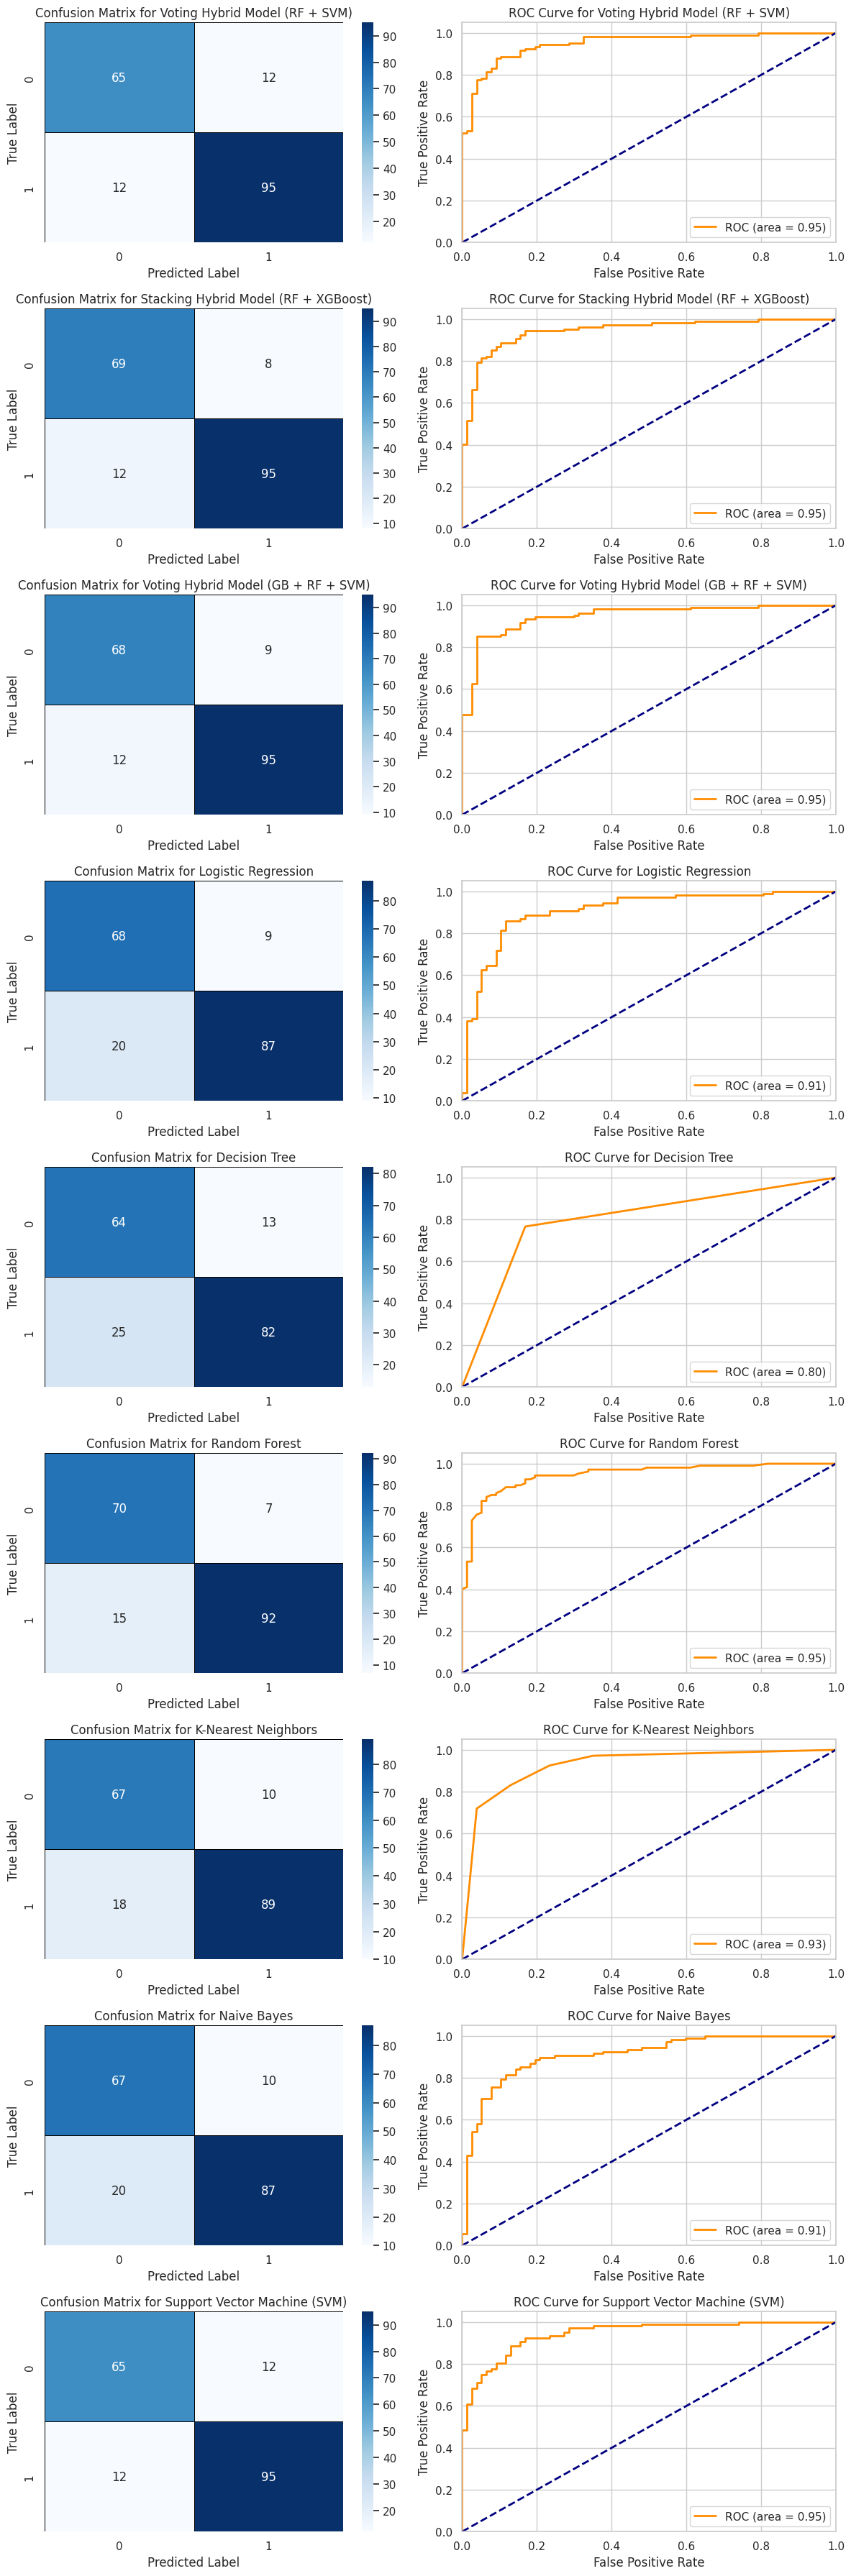

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

# List of classifiers and their names
classifiers = {
    "Voting Hybrid Model (RF + SVM)": voting_model,
    "Stacking Hybrid Model (RF + XGBoost)": stacking_model_rf_xgb,
    "Voting Hybrid Model (GB + RF + SVM)": voting_model_gb_rf_svm,
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Support Vector Machine (SVM)": SVC(random_state=42)
}

# Create subplots: 2 rows and 2 columns for confusion matrix and ROC curves
fig, axs = plt.subplots(len(classifiers), 2, figsize=(12, len(classifiers)*4))

# Loop through classifiers and evaluate
for idx, (name, clf) in enumerate(classifiers.items()):
    print(f"\n--- Evaluating: {name} ---")

    # Fit the model if not already fitted
    clf.fit(X_train_scaled, y_train)

    # Predicting on the test set
    y_pred = clf.predict(X_test_scaled)

    # Accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy of {name}: {accuracy * 100:.2f}%")

    # Classification report
    print(f"Classification Report for {name}:\n", classification_report(y_test, y_pred))

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=0.5, linecolor='black', ax=axs[idx, 0])
    axs[idx, 0].set_title(f'Confusion Matrix for {name}')
    axs[idx, 0].set_xlabel('Predicted Label')
    axs[idx, 0].set_ylabel('True Label')

    # ... (previous code)

    # ROC Curve
    if hasattr(clf, "predict_proba"):  # Check if the model has predict_proba method
        y_prob = clf.predict_proba(X_test_scaled)[:, 1]  # Probability estimates for the positive class
    else:  # For SVM with no predict_proba, we can use decision function
        y_prob = clf.decision_function(X_test_scaled)

    # Convert y_test to numerical if it's not already
    y_test_numeric = y_test.astype(int)  # Convert to integer type

    fpr, tpr, thresholds = roc_curve(y_test_numeric, y_prob)  # Use y_test_numeric here
    roc_auc = auc(fpr, tpr)

    # ... (rest of the code)

    # Plot ROC Curve
    axs[idx, 1].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC (area = {roc_auc:.2f})')
    axs[idx, 1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    axs[idx, 1].set_xlim([0.0, 1.0])
    axs[idx, 1].set_ylim([0.0, 1.05])
    axs[idx, 1].set_xlabel('False Positive Rate')
    axs[idx, 1].set_ylabel('True Positive Rate')
    axs[idx, 1].set_title(f'ROC Curve for {name}')
    axs[idx, 1].legend(loc="lower right")

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()
